In [1]:
import numpy as np
import joblib
import pandas as pd

from sklearn.model_selection import KFold, train_test_split

import validation_funcs as validation_funcs

seed = 777
rng = np.random.default_rng(seed)

def rng_int():
    return rng.integers(1, 10000)

In [2]:
dtc = joblib.load(f'../dump/decision_tree_a97.pkl')

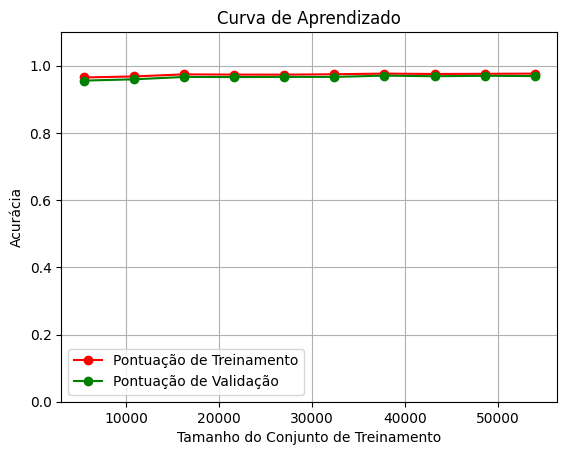

In [3]:
df = pd.read_csv('../../data/preprocessed/_90_drp_outl.csv', index_col='obj_ID')

X = df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, stratify=y, random_state=rng_int())
kfold = KFold(n_splits=5, shuffle=True, random_state=rng_int())

validation_funcs.plot_learning_curve(dtc, X_train, y_train, kfold, scoring='accuracy')